# Lead Scoring 

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
    
   The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
    
   Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 
    

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


## Goals
There are quite a few goals for this case study.


Build a model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. 

# 0. Importing Modules

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import xticks
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## 1. Loading the CSV and Data Inspection

### 1.1 Data Loading

In [2]:
leads_df = pd.read_csv(r"Leads.csv")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 1.2 Remove Columns which are now generated after we call a lead

In [3]:
leads_df.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index',
           'Asymmetrique Activity Score','Asymmetrique Profile Score',
           'Tags','Lead Quality','Lead Profile'],axis= 1, inplace = True)

### 1.3 Duplicate Check

In [4]:
lead_dup = leads_df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
lead_dup.drop_duplicates(subset=None, inplace=True)
lead_dup.shape, leads_df.shape

((9240, 30), (9240, 30))

- **The shape is same for both dataframes. Hence, No Duplicate values.**

### 1.4 Data General Inspection

In [5]:
leads_df.shape

(9240, 30)

In [6]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


#### `INSIGHT`
- There are 9240 rows and 30 columns in dataframe after dropping some irrelevant columns
- There are 25 columns of `object` datatype and `3` of `int64` datatype and `2` of `float64` datatype

# 2. Data Cleaning
## 2.1 Replacing `Select` value in some columns with null values
- This is because customer did not select any option from the list, hence it shows select. Select values are as good as NULL.

In [8]:
# Converting 'Select' values to NaN.
leads_df = leads_df.replace('Select', np.nan)
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified


## 2.2 Dropping `Lead Number` and `Prospect ID`
- These two columns are irrelevant to analysis as they are just ID columns

In [9]:
leads_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)
leads_df.shape

(9240, 28)

## 2.3 checking the null percentage in all columns

In [10]:
100*(leads_df.isnull().sum()/leads_df.shape[0]).sort_values(ascending=False)

How did you hear about X Education               78.463203
City                                             39.707792
Specialization                                   36.580087
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
Total Time Spent on Website                       0.000000
Last Notable Activity                             0.000000
A free copy of Mastering The Interview            0.000000
Search                                            0.0000

## 2.4 Dealing with Null values

In [11]:
# we will drop the columns having more than 60% NA values.
leads_df.drop(leads_df.columns[100*(leads_df.isnull().sum()/leads_df.shape[0])>60],axis=1,inplace=True)
leads_df.shape

(9240, 27)

- So, concentrating on columns having considerable missing values. They are

|Column Names|Null percentage|
|--|--|
City|                                             39.707792|
Specialization|                                   36.580087|
What matters most to you in choosing a course|    29.318182|
What is your current occupation|                  29.112554|
Country|                                          26.634199|

In [12]:
null_col = ['City','Specialization','What matters most to you in choosing a course','What is your current occupation','Country']
for i in null_col:
    print(leads_df[i].value_counts(normalize=True))

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64
Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.0124

- All 5 columns are categorical. So, the imputing value for null are

|Column|Value imputing|%age of how often that value occurs|
|--|--|--|
|City|Mumbai|57.8%|
|What matters most to you in choosing a course|Better Career Prospects     | 0.999541|
|What is your current occupation|Unemployed            |  0.854962|
|Country|India                  | 0.957663|
|Specialization|Other||

- **For `Specialization`, there is no clear value that can be imputed. Non Availability of the option they want to choose maybe the reason behind the null values. So, replacing null values in `Specialization` with `Other`.**

In [13]:
leads_df['City'].replace(np.nan,'Mumbai',inplace=True)

leads_df['Specialization'].replace(np.nan, 'Others',inplace=True)

leads_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects',inplace=True)

leads_df['What is your current occupation'].replace(np.nan, 'Unemployed',inplace=True)

leads_df['Country'].replace(np.nan, 'India',inplace=True)

In [14]:
# Rest missing values are under 1.5% so we can drop these rows.
leads_df.dropna(inplace = True)

In [15]:
# checking null values again
100*(leads_df.isnull().sum()/leads_df.shape[0]).sort_values(ascending=False)

Last Notable Activity                            0.0
What matters most to you in choosing a course    0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
Search                                           0.0
A free copy of Mastering The Interview           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

- Data is now free of `null` values

## 2.5 Checking the Data retained after clearing out the null values 

In [16]:
print(100*(leads_df.shape[0]/ lead_dup.shape[0]),"% of original rows is available for EDA")

98.2034632034632 % of original rows is available for EDA


### `INSIGHT`
- **98.2% of data is retained**
- **Data is free of null values**

# 3.Exploratory Data Analytics

## 3.1 Univariate Analysis

### Lead Origin

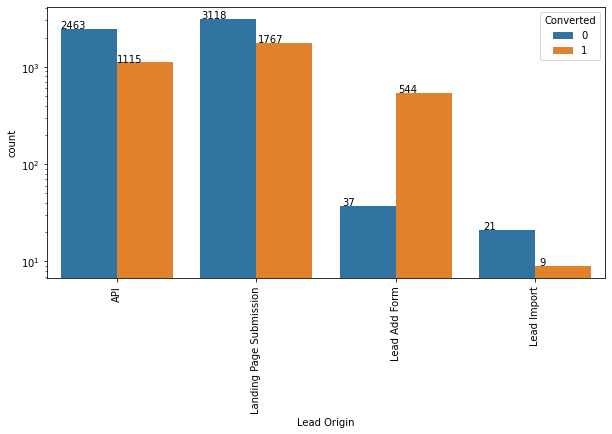

In [17]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [18]:
100*(leads_df.Converted.groupby(leads_df['Lead Origin']).mean()).sort_values(ascending=False)

Lead Origin
Lead Add Form              93.631670
Landing Page Submission    36.171955
API                        31.162661
Lead Import                30.000000
Name: Converted, dtype: float64

- `API` and `Landing Page Submission` have `31.16%` and `36.17%` conversion rate respectively and count of lead originated from them are considerable.
- `Lead Add Form` has `93.63%` conversion rate but count of lead are not very high.
- `Lead Import` are very less in count.

### `INSIGHT`
- **Generate more leads from `Lead Add Form`.**
- **To improve overall lead conversion rate, we need to focus more on improving lead conversion of `API` and `Landing Page Submission`**

### Lead Source

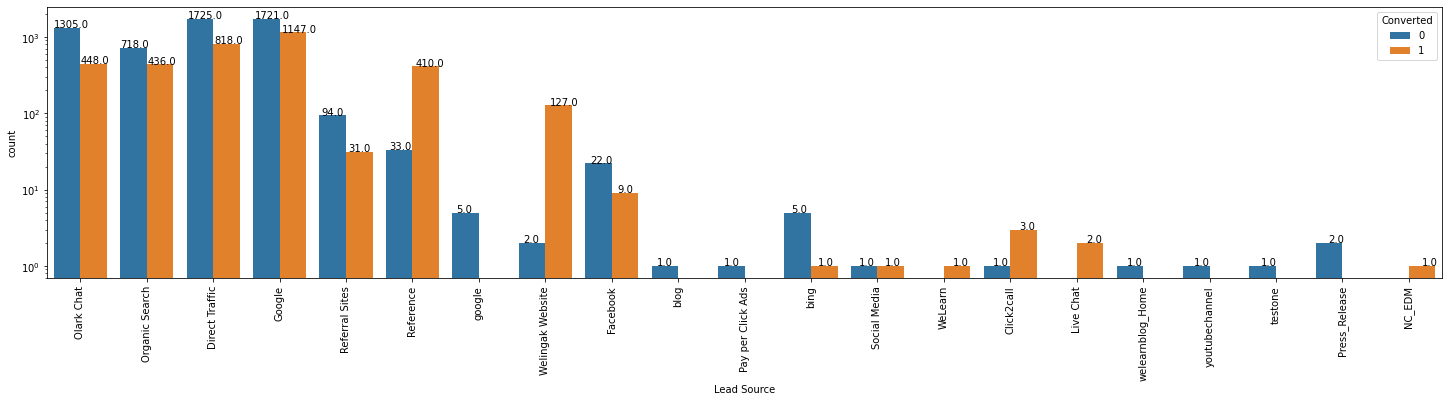

In [19]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Lead Source", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- Replacing the values having less occurance because it makes analysis too complicated.
- Replacing `google` with `Google`.
- Replacing these values with `Others`

|Values with less occurance||||
|--|--|--|--|
|Click2call|Live Chat|NC_EDM|Pay per Click Ads|
Press_Release|Social Media|WeLearn|bing|
blog|testone|welearnblog_Home|youtubechannel|

In [20]:
leads_df['Lead Source'].replace(['google'], 'Google',inplace=True)
leads_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others',inplace=True)
leads_df['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                23
Name: Lead Source, dtype: int64

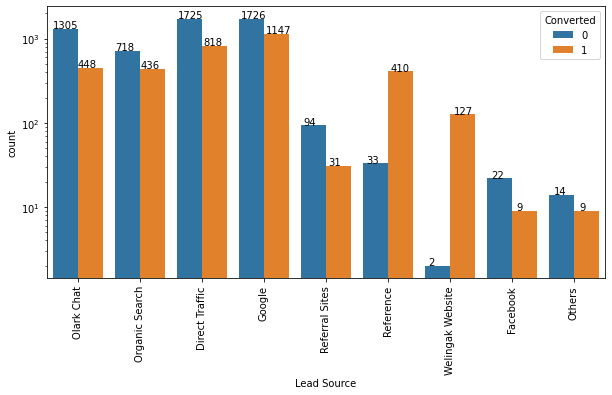

In [21]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Lead Source", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [22]:
100*(leads_df.Converted.groupby(leads_df['Lead Source']).mean()).sort_values(ascending=False)

Lead Source
Welingak Website    98.449612
Reference           92.550790
Google              39.923425
Others              39.130435
Organic Search      37.781629
Direct Traffic      32.166732
Facebook            29.032258
Olark Chat          25.556189
Referral Sites      24.800000
Name: Converted, dtype: float64

- `Google` and `Direct Traffic` generates maximum number of leads.
- Conversion Rate of `Reference`, `welingak website` leads are high.

### `INSIGHT`
- **Generate more leads from `Reference` and `Welingak Website`.**
- **To improve overall lead conversion rate, focus should be on improving lead conversion of `Olark Chat`, `Organic Search`, `Direct Traffic`, and `Google` leads**

### Do Not Email & Do Not Call

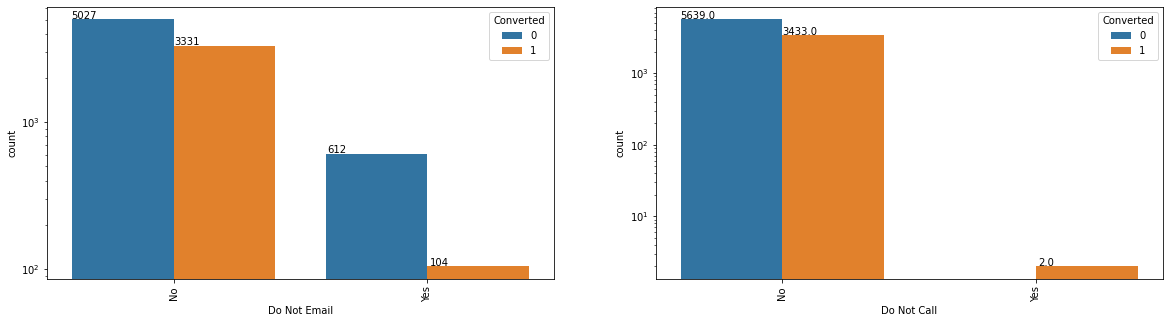

In [23]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
ax= sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.subplot(1,2,2)
ax= sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [24]:
print(leads_df.Converted.groupby(leads_df['Do Not Email']).mean())
print(leads_df.Converted.groupby(leads_df['Do Not Call']).mean())

Do Not Email
No     0.398540
Yes    0.145251
Name: Converted, dtype: float64
Do Not Call
No     0.378417
Yes    1.000000
Name: Converted, dtype: float64


- For `Do Not Call`, the conversion rate of `Yes` is very high but the number of leads are just 2. So, we can't take that seriously
- Most of the leads are ok with `Email` and `Call`
### `INSIGHT`

- Not much can be inferred from both `Do Not Call` and `Do Not Email`

### Total Visits

In [25]:
leads_df.TotalVisits.describe(percentiles=[.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

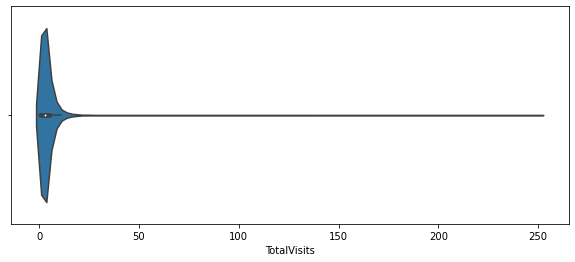

In [26]:
plt.figure(figsize = (10,4))
sns.violinplot(leads_df.TotalVisits)
plt.show()

- There are a number of outliers in this column `TotalVisits`.So, we will cap the outliers to 95% value for analysis.

In [27]:
percentiles = leads_df['TotalVisits'].quantile([0.05,0.95]).values
leads_df['TotalVisits'][leads_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_df['TotalVisits'][leads_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

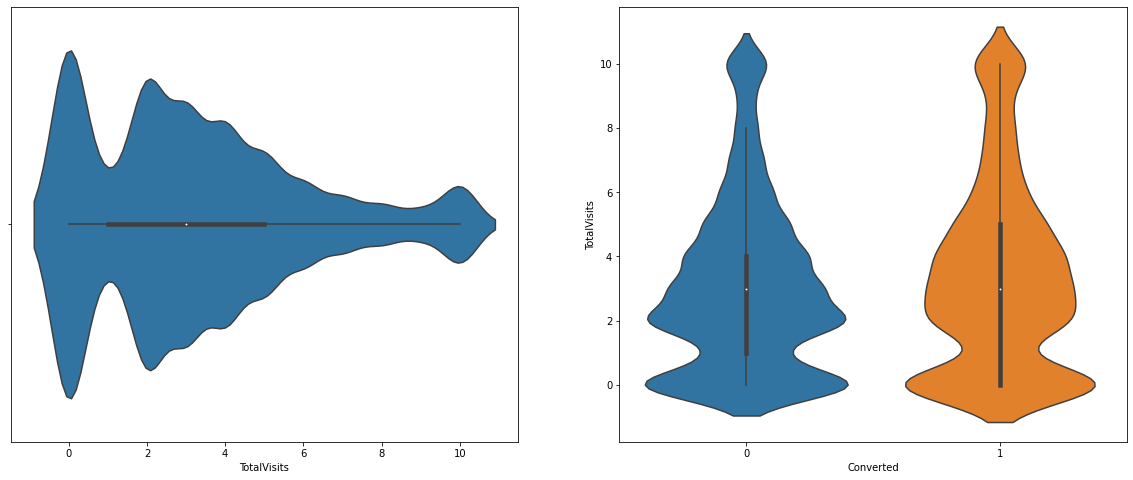

In [28]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.violinplot(leads_df.TotalVisits)
plt.subplot(1,2,2)
sns.violinplot(y = 'TotalVisits', x = 'Converted', data = leads_df)
plt.show()

- Median for converted and not converted leads are the same.

### `INSIGHT`
**Nothng conclusive can be said on the basis of Total Visits.**
### Total time spent on website

In [29]:
leads_df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

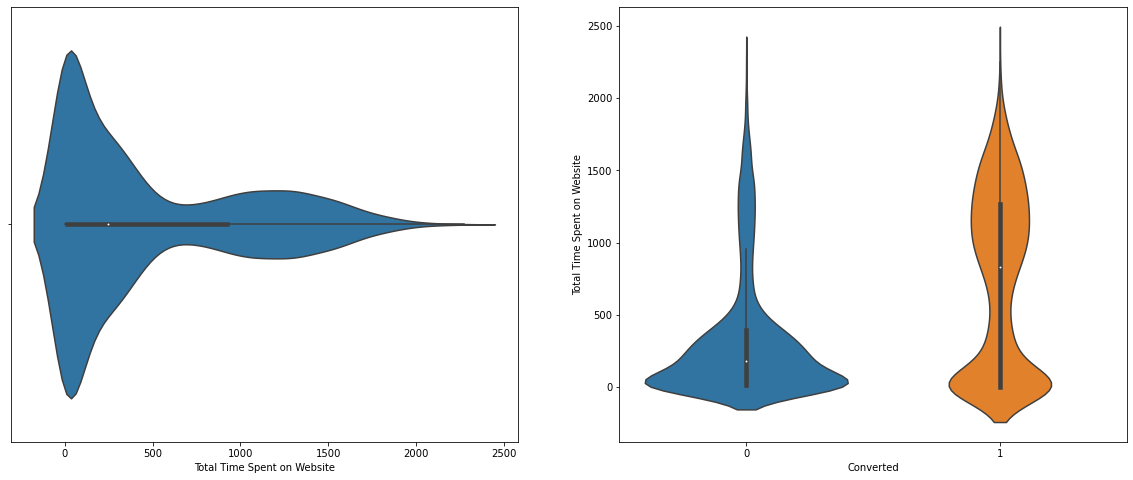

In [30]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.violinplot(leads_df['Total Time Spent on Website'])
plt.subplot(1,2,2)
sns.violinplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_df)
plt.show()

- Leads spending more time on the website are more likely to be converted.

### `INSIGHT`

- **Website should be made more engaging and intuitive with more information so that leads spend more them. Thus, increasing the chances of lead conversion.**

### Page views per visit

In [31]:
leads_df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

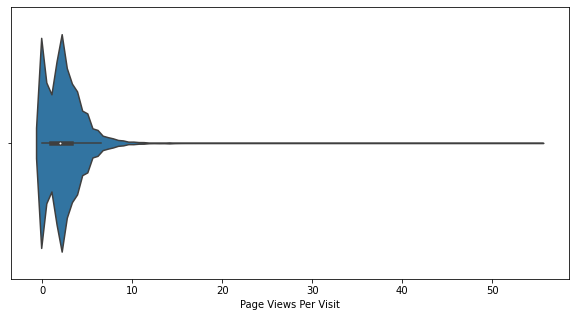

In [32]:
plt.figure(figsize = (10,5))
sns.violinplot(leads_df['Page Views Per Visit'])
plt.show()

- There are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [33]:
percentiles = leads_df['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

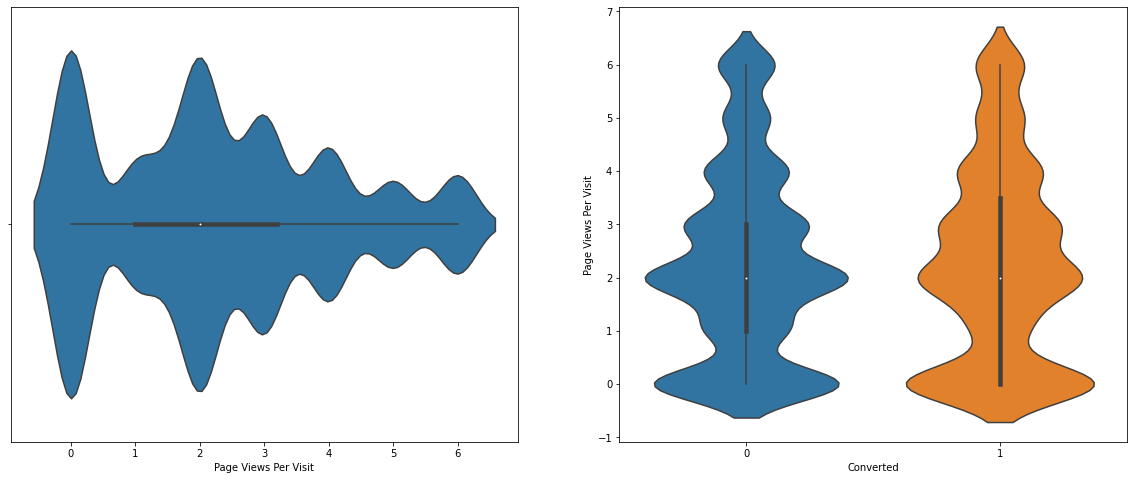

In [34]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.violinplot(leads_df['Page Views Per Visit'])

plt.subplot(1,2,2)
sns.violinplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_df)
plt.show()

- Median for converted and unconverted leads is the same.

### `INSIGHT`
- **Nothing much can be inferred from `Page Views Per Visit` about lead conversion**

### Last Activity

In [35]:
leads_df['Last Activity'].value_counts(normalize=True)

Email Opened                    0.378223
SMS Sent                        0.299317
Olark Chat Conversation         0.107119
Page Visited on Website         0.070531
Converted to Lead               0.047168
Email Bounced                   0.034384
Email Link Clicked              0.029425
Form Submitted on Website       0.012784
Unreachable                     0.009918
Unsubscribed                    0.006502
Had a Phone Conversation        0.002755
View in browser link Clicked    0.000661
Approached upfront              0.000551
Email Marked Spam               0.000220
Email Received                  0.000220
Visited Booth in Tradeshow      0.000110
Resubscribed to emails          0.000110
Name: Last Activity, dtype: float64

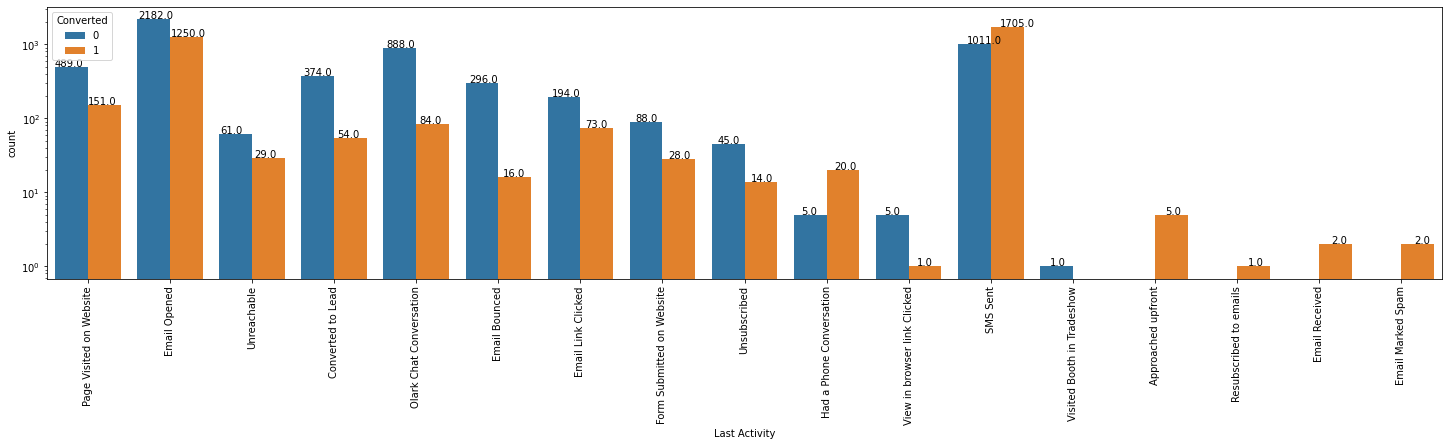

In [36]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Last Activity", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- Clubbing these columns to `Other_Activity` because the leads from these columns individually are very less and can complicate the analysis.

||||
|--|--|--|
|Had a Phone Conversation|View in browser link Clicked|Visited Booth in Tradeshow|
Approached upfront|Resubscribed to emails|Email Received|
Email Marked Spam|||

In [37]:
leads_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'],
                                                      'Other_Activity',inplace=True)

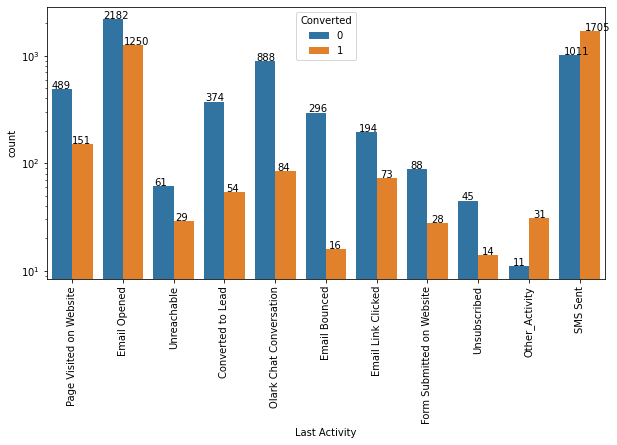

In [38]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Last Activity", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [39]:
100*(leads_df.Converted.groupby(leads_df['Last Activity']).mean()).sort_values(ascending=False)

Last Activity
Other_Activity               73.809524
SMS Sent                     62.776141
Email Opened                 36.421911
Unreachable                  32.222222
Email Link Clicked           27.340824
Form Submitted on Website    24.137931
Unsubscribed                 23.728814
Page Visited on Website      23.593750
Converted to Lead            12.616822
Olark Chat Conversation       8.641975
Email Bounced                 5.128205
Name: Converted, dtype: float64

- Most of the lead have their `Email Opened` and `SMS Sent` as their last activity.
- Conversion rate for leads with last activity as `SMS Sent` is almost 62%.

### `INSIGHT`

- `SMS Sent` has high leads conversion

### Country

In [40]:
leads_df.Country.value_counts()

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Canada                     4
Germany                    4
Nigeria                    4
Kuwait                     4
Sweden                     3
Uganda                     2
Italy                      2
Bangladesh                 2
Ghana                      2
Philippines                2
Asia/Pacific Region        2
China                      2
Netherlands                2
Belgium                    2
Russia                     1
Vietnam                    1
Denmark                    1
Malaysia                   1
Kenya                      1
Liberia                    1
Switzerland   

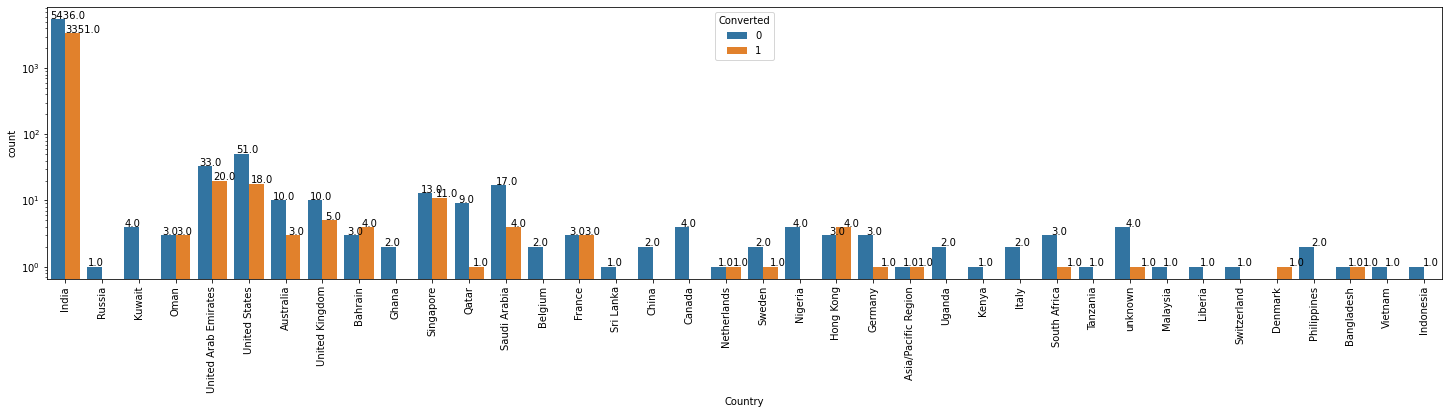

In [41]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Country", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [42]:
100*(leads_df.Converted.groupby(leads_df.Country).mean()).sort_values(ascending=False)

Country
Denmark                 100.000000
Hong Kong                57.142857
Bahrain                  57.142857
Asia/Pacific Region      50.000000
Bangladesh               50.000000
France                   50.000000
Netherlands              50.000000
Oman                     50.000000
Singapore                45.833333
India                    38.135883
United Arab Emirates     37.735849
United Kingdom           33.333333
Sweden                   33.333333
United States            26.086957
South Africa             25.000000
Germany                  25.000000
Australia                23.076923
unknown                  20.000000
Saudi Arabia             19.047619
Qatar                    10.000000
Nigeria                   0.000000
Uganda                    0.000000
Tanzania                  0.000000
Switzerland               0.000000
Belgium                   0.000000
Canada                    0.000000
China                     0.000000
Sri Lanka                 0.000000
Russia      

- Most leads are from `India`. So, `India` is the core market for the business.
- There is high lead conversion from `Europe`, `USA`, `Middle East`.

### `INSIGHT`

**There is a huge potential from `Europe`, `USA`, `Middle East`**

### Specialization

In [43]:
leads_df.Specialization.value_counts()

Others                               3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

- Renaming `Others` to `Other_Specialization`.

In [44]:
leads_df['Specialization'].replace(['Others'], 'Other_Specialization',inplace=True)

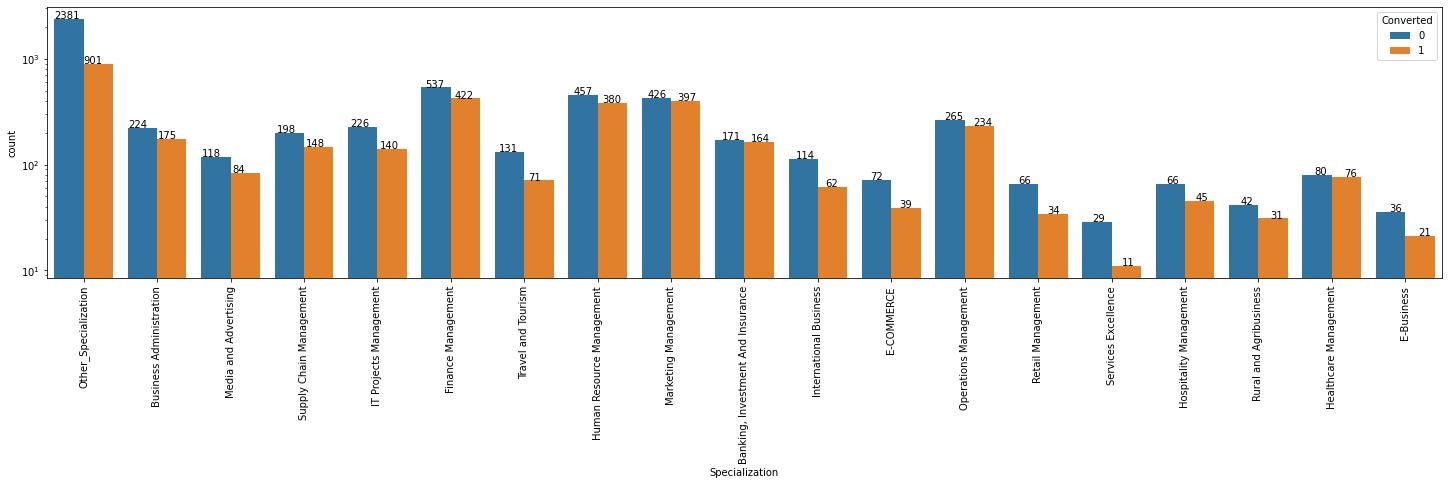

In [45]:
plt.figure(figsize = (25,5))
ax= sns.countplot(x = "Specialization", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [46]:
100*(leads_df.Converted.groupby(leads_df.Specialization).mean()).sort_values(ascending=False)

Specialization
Banking, Investment And Insurance    48.955224
Healthcare Management                48.717949
Marketing Management                 48.238153
Operations Management                46.893788
Human Resource Management            45.400239
Finance Management                   44.004171
Business Administration              43.859649
Supply Chain Management              42.774566
Rural and Agribusiness               42.465753
Media and Advertising                41.584158
Hospitality Management               40.540541
IT Projects Management               38.251366
E-Business                           36.842105
International Business               35.227273
Travel and Tourism                   35.148515
E-COMMERCE                           35.135135
Retail Management                    34.000000
Services Excellence                  27.500000
Other_Specialization                 27.452773
Name: Converted, dtype: float64

- There is no clear value with high conversion rate.
- These are the top 5 `Specializations` with high conversion rate

|Specialization|Conversion rate|
|--|--|
Banking, Investment And Insurance|    48.955224|
Healthcare Management             |   48.717949|
Marketing Management               |  48.238153|
Operations Management               | 46.893788|
Human Resource Management            |45.400239|

### `INSIGHT`
- There are no specializations that stand out when it comes to lead conversion rate.
- It's better to concentrate more on the above 5 specializations.

### Occupation

In [47]:
leads_df['What is your current occupation'].value_counts()

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

- Renaming `Other` to `Other_Occupation`

In [48]:
leads_df['What is your current occupation'].replace(['Other'], 'Other_Occupation',inplace=True)

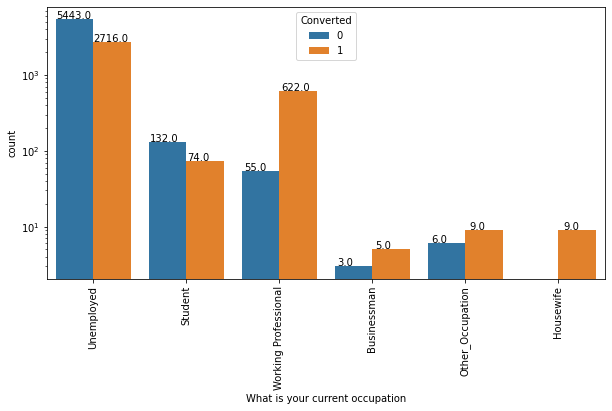

In [49]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [50]:
leads_df.Converted.groupby(leads_df['What is your current occupation']).mean().sort_values(ascending=False)

What is your current occupation
Housewife               1.000000
Working Professional    0.918759
Businessman             0.625000
Other_Occupation        0.600000
Student                 0.359223
Unemployed              0.332884
Name: Converted, dtype: float64

- leads from `Working Professional`,`Businessman` have high chances of converting to paying customer.
- Most leads are from `Unemployed`but has around 30-35% conversion rate.

### `INSIGHT`
- We should concentrate more on `Working Professional` and `Businessman`

### What matters most to you in choosing a course

In [51]:
leads_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9072
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

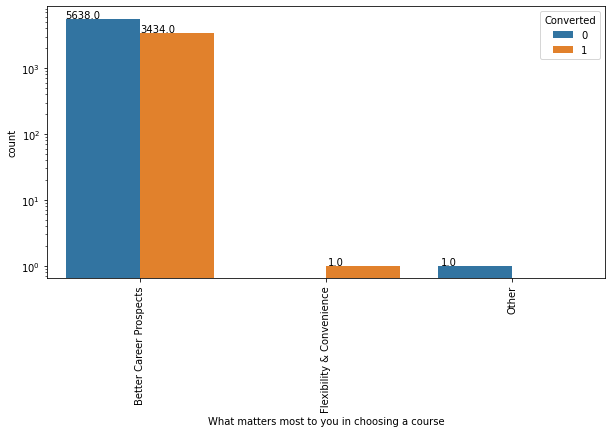

In [52]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [53]:
100*(leads_df.Converted.groupby(leads_df['What matters most to you in choosing a course']).mean()).sort_values(ascending=False)

What matters most to you in choosing a course
Flexibility & Convenience    100.000000
Better Career Prospects       37.852734
Other                          0.000000
Name: Converted, dtype: float64

- Almost all leads chose 'Better Career Prospects'.

### `INSIGHT`
- Nothing much can be inferred from this column

### Search

In [54]:
leads_df.Search.value_counts()

No     9060
Yes      14
Name: Search, dtype: int64

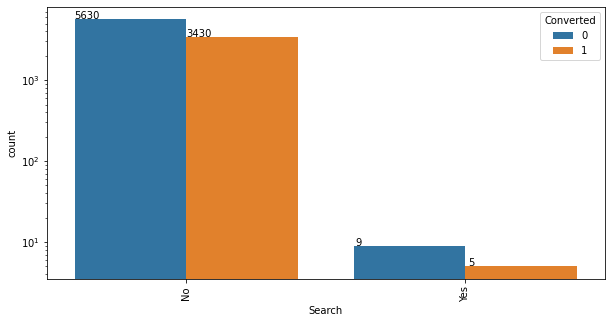

In [55]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Search", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [56]:
100*(leads_df.Converted.groupby(leads_df.Search).mean()).sort_values(ascending=False)

Search
No     37.858720
Yes    35.714286
Name: Converted, dtype: float64

- Almost all entries are `No`.

### `INSIGHT`
- Nothing much can be inferred from this column.

### Magazine

In [57]:
leads_df.Magazine.value_counts()

No    9074
Name: Magazine, dtype: int64

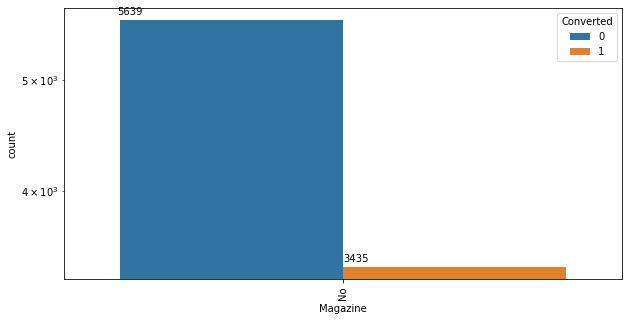

In [58]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Magazine", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- All entries are `No`.

### `INSIGHT`
- Not much can be inferred from this column.

### Newspaper Article

In [59]:
leads_df['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

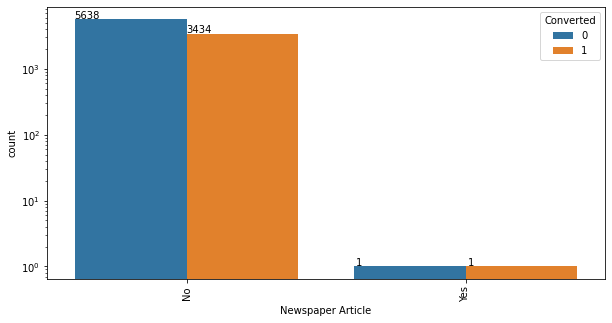

In [60]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- Almost all entries are `No`.

### `INSIGHT`
- Not much can be inferred from this column.

### X Education Forums

In [61]:
leads_df['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

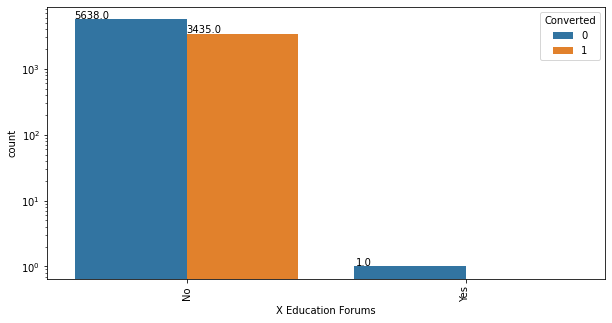

In [62]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "X Education Forums", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- Almost all entries are `No`.

### `INSIGHT`
- Not much can be inferred from this column.

### Newspaper

In [63]:
leads_df['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

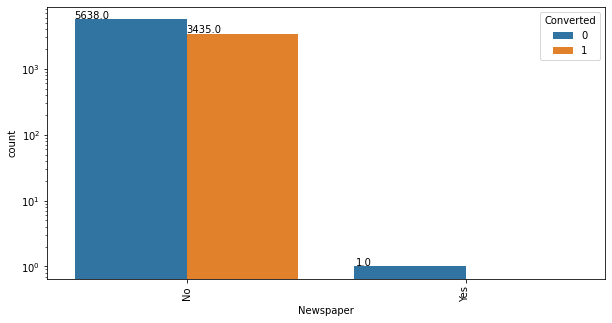

In [64]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Newspaper", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- Almost all entries are `No`.

### `INSIGHT`
- Not much can be inferred from this column.

### Digital Advertisement

In [65]:
leads_df['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

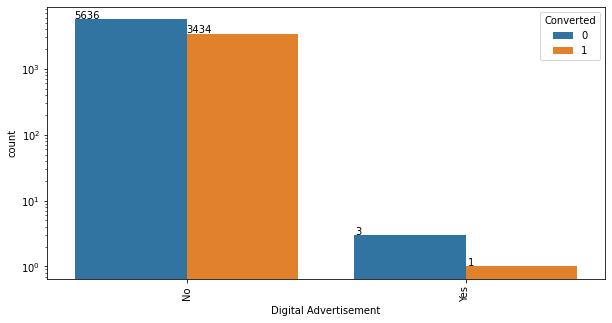

In [66]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- Almost all entries are `No`.

### `INSIGHT`
- Not much can be inferred from this column.

### Through Recommendations

In [67]:
leads_df['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

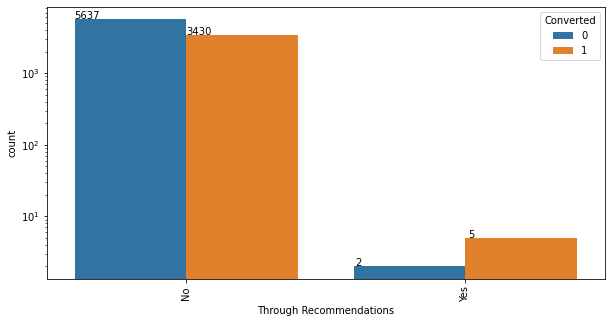

In [68]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- Almost all entries are `No`.

### `INSIGHT`
- Not much can be inferred from this column.

### Receive More Updates About Our Courses

In [69]:
leads_df['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

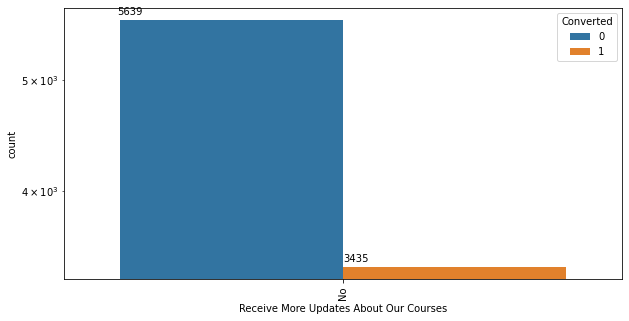

In [70]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- All entries are `No`. 

### `INSIGHT`
- Not much can be inferred from this column.

### Update me on Supply Chain Content

In [71]:
leads_df['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

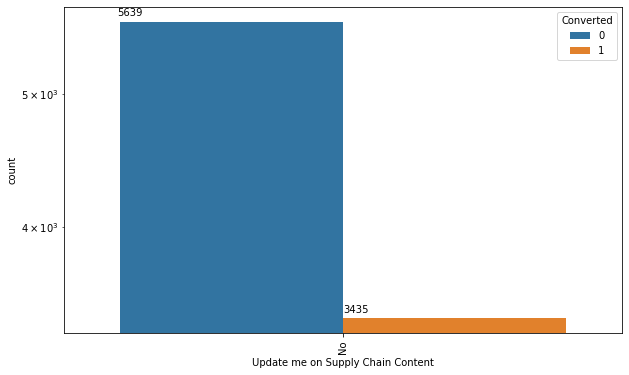

In [72]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- All entries are 'No'. 

### `INSIGHT`
- Not much can be inferred from this column.

### Get updates on DM Content

In [73]:
leads_df['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

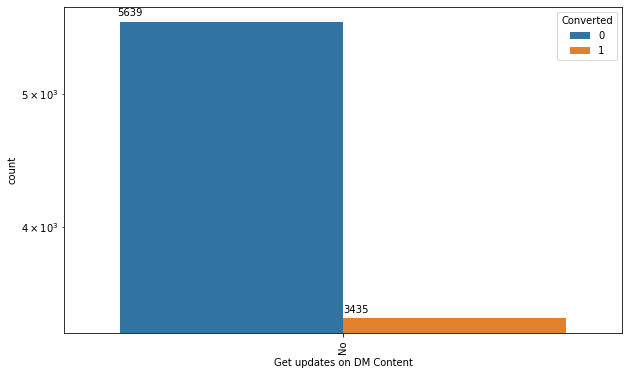

In [74]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- All entries are 'No'. 

### `INSIGHT`
- Not much can be inferred from this column.

### I agree to pay the amount through cheque

In [75]:
leads_df['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

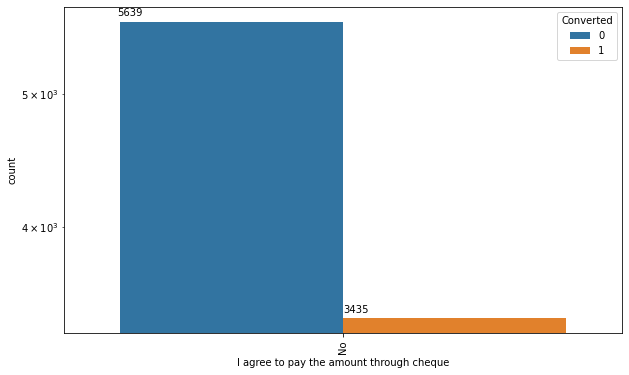

In [76]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

- All entries are 'No'.

### `INSIGHT`
- Not much can be inferred from this column.

### A free copy of Mastering The Interview

In [77]:
leads_df['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

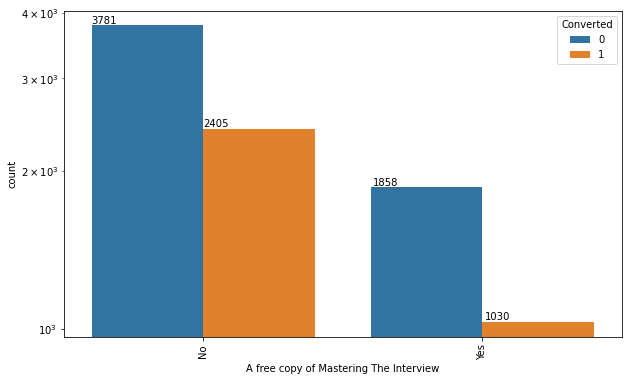

In [78]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

### `INSIGHT`
- `A free copy of Mastering The Interview` doesn't help much in analysis

### City

In [79]:
leads_df.City.value_counts()

Mumbai                         6752
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

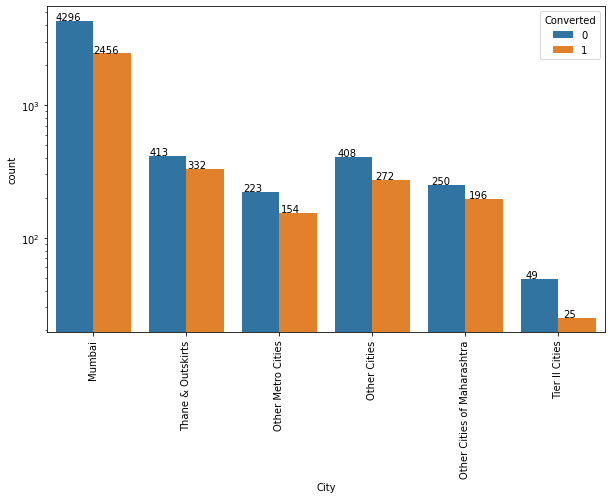

In [80]:
plt.figure(figsize = (10,6))
ax= sns.countplot(x = "City", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [81]:
100*(leads_df.Converted.groupby(leads_df.City).mean()).sort_values(ascending=False)

City
Thane & Outskirts              44.563758
Other Cities of Maharashtra    43.946188
Other Metro Cities             40.848806
Other Cities                   40.000000
Mumbai                         36.374408
Tier II Cities                 33.783784
Name: Converted, dtype: float64

- Most leads are from `Mumbai` with 36.37% conversion rate.
- `Thane & Outskirts` and `Other Cities of Maharashtra` have considerable lead conversion rate with considerable lead count.

### `INSIGHT`
- Focus more on `Thane & Outskirts` and `Other Cities of Maharashtra` as the yhave considerable lead conversion rates

### Last Notable Activity

In [82]:
leads_df['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Email Received                     1
Approached upfront                 1
Form Submitted on Website          1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

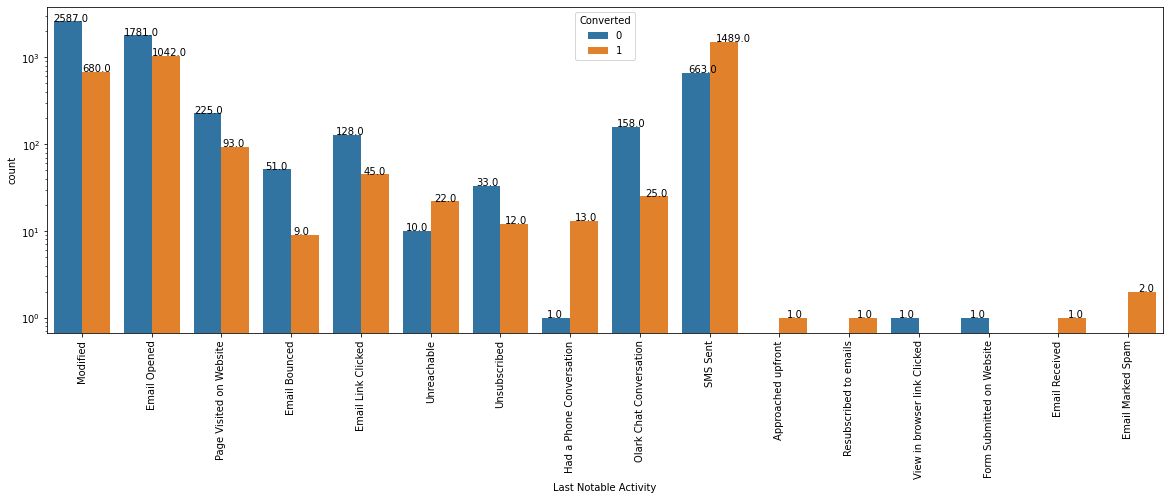

In [83]:
plt.figure(figsize = (20,6))
ax= sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
ax.set_yscale('log')
plt.show()

In [84]:
100*(leads_df.Converted.groupby(leads_df['Last Notable Activity']).mean()).sort_values(ascending=False)

Last Notable Activity
Resubscribed to emails          100.000000
Email Received                  100.000000
Email Marked Spam               100.000000
Approached upfront              100.000000
Had a Phone Conversation         92.857143
SMS Sent                         69.191450
Unreachable                      68.750000
Email Opened                     36.911087
Page Visited on Website          29.245283
Unsubscribed                     26.666667
Email Link Clicked               26.011561
Modified                         20.814203
Email Bounced                    15.000000
Olark Chat Conversation          13.661202
View in browser link Clicked      0.000000
Form Submitted on Website         0.000000
Name: Converted, dtype: float64

- `SMS Sent` having both high lead count and significant lead conversion rate of `69.19%`
- `Had a Phone Conversation` having good conversion rate of `92.8%` but had less lead count.

### `INSIGHT`
- We should focus more on `calling the leads` as the conversion rate is high though the lead count is less.
- `SMS Sent`is a strong positive predictor

## **Results**


**Based on the univariate analysis, There are some columns which cannot bring much to analysis and model building. Hence, Dropping these columns from further analysis**

|Columns which dont bring much to analysis||||
|--|--|--|--|
|What matters most to you in choosing a course|Search|Magazine|Newspaper Article
X Education Forums|Newspaper|Digital Advertisement|Through Recommendations|
Receive More Updates About Our Courses|Update me on Supply Chain Content|Get updates on DM Content|I agree to pay the amount through cheque|
|A free copy of Mastering The Interview|Country|

In [85]:
leads_df.drop(['What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],axis=1,inplace=True)
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City', 'Last Notable Activity'],
      dtype='object')

## 3.2 Checking `correlation coefficients` to see which variables are highly correlated

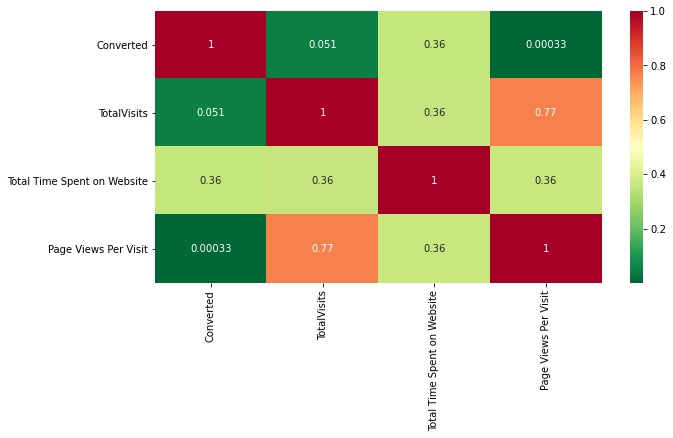

In [86]:
plt.figure(figsize = (10,5))
sns.heatmap(leads_df.corr(), annot = True, cmap="RdYlGn_r")
plt.show()

- `TotalVisits` & `Page Views per Visit` are higly correlated with correlation coefficient `0.77`

In [87]:
print(leads_df['Last Activity'].value_counts())
print(leads_df['Last Notable Activity'].value_counts())

Email Opened                 3432
SMS Sent                     2716
Olark Chat Conversation       972
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 312
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    90
Unsubscribed                   59
Other_Activity                 42
Name: Last Activity, dtype: int64
Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Email Received                     1
Approached upfront                 1
Form Submitted on Website          1
View in browser link Clicked       1


- Some values of `Last Activity` are coverved as values under `Last Notable Activity`
- So, dropping `Last Notable Activity`

In [88]:
leads_df.drop(['Last Notable Activity'],axis= 1, inplace = True)
leads_df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'City'],
      dtype='object')

In [89]:
print('%age of Columns retained = ',(leads_df.shape[1]/lead_dup.shape[1])*100,'%')

%age of Columns retained =  40.0 %


In [90]:
print("%age of rows retained = ",(leads_df.shape[0]/lead_dup.shape[0])*100,'%')

%age of rows retained =  98.2034632034632 %


In [91]:
leads_df.shape

(9074, 12)

In [92]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Mumbai
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Mumbai
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Mumbai


# 4. Data Preparation
## 4.1 Converting some binary variables (Yes/No) to 1/0

In [93]:
# List of variables to map

bin_col =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_df[bin_col] = leads_df[bin_col].apply(binary)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Mumbai
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Mumbai
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Mumbai


## 4.2 Creating a dummy variable for some of the categorical variables and dropping the first one.

In [94]:
dummy = pd.get_dummies(leads_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'City']], drop_first=True)

dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [95]:
# Adding the results to the master dataframe
leads_df = pd.concat([leads_df, dummy], axis=1)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Mumbai,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Mumbai,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Mumbai,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [96]:
leads_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City'], axis = 1,inplace=True)
leads_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [97]:
leads_df.shape

(9074, 55)

## 4.3 TRAIN - TEST SPLIT

In [98]:
from sklearn.model_selection import train_test_split

# Feature variables dataframe as X
X = leads_df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [99]:
X.shape

(9074, 54)

In [100]:
# Dependent variable as y
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [101]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=333)

In [102]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
9190,0,0,4.0,346,4.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8604,0,0,10.0,165,5.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2916,0,0,4.0,639,4.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
189,0,0,6.0,385,6.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3037,0,0,2.0,450,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [103]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((7259, 54), (1815, 54), (7259,), (1815,))

## 4.4 Feature Scaling
- Using Standardization as the way to scale the features

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
9190,0,0,0.300780,-0.255196,0.976193,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8604,0,0,2.467531,-0.587537,1.534715,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2916,0,0,0.300780,0.282792,0.976193,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
189,0,0,1.023031,-0.183587,2.093237,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3037,0,0,-0.421470,-0.064238,-0.140852,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [105]:
# Checking the Conversion Rate
print(round((sum(leads_df['Converted'])/leads_df.Converted.shape[0])*100,2),'% is the conversion rate')

37.86 % is the conversion rate


## 4.5 Model Building

In [106]:
import statsmodels.api as sm

# Logistic regression model
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7204
Model Family:                Binomial   Df Model:                           54
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2954.2
Date:                Mon, 07 Sep 2020   Deviance:                       5908.5
Time:                        20:57:35   Pearson chi2:                 7.50e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3326      1.094     -0.304      0.761      -2.477       1.811
Do Not Email                                            -1.2676      0.203     -6.237      0.000      -1.666      -0.869
Do Not Call                                             21.4958   3.09e+04      0.001      0.999   -6.05e+04    6.05e+04
TotalVisits                                              0.3479      0.052      6.741      0.000       0.247       0.449
Total Time Spent on Website                              1.1034      0.038     28.936      0.000       1.029       1.178
Page Views Per Visit                                    -0.3372      0.058     -5.829      0.000      -0.451      -0.224
Lead Origin_Landing Page Submission                     -0.9274      0.129     -7.196      0.000      -1.180      -0.675
Lead Origin_Lead Add Form                                1.6305      0.956      1.706      0.088      -0.242       3.503
Lead Origin_Lead Import                                 21.6614   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Facebook                                   -21.1112   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                       0.3431      0.091      3.788      0.000       0.166       0.521
Lead Source_Olark Chat                                   1.3435      0.151      8.886      0.000       1.047       1.640
Lead Source_Organic Search                               0.2359      0.121      1.948      0.051      -0.001       0.473
Lead Source_Others                                       0.6768      0.650      1.041      0.298      -0.598       1.951
Lead Source_Reference                                    1.9740      0.977      2.021      0.043       0.060       3.888
Lead Source_Referral Sites                              -0.1460      0.329     -0.444      0.657      -0.791       0.499
Lead Source_Welingak Website                             5.2881      1.395      3.791      0.000       2.554       8.022
Last Activity_Email Bounced                              0.2136      0.419      0.510      0.610      -0.607       1.034
Last Activity_Email Link Clicked                         0.7729      0.277      2.793      0.005       0.231       1.315
Last Activity_Email Opened                               1.0895      0.204      5.342      0.000       0.690       1.489
Last Activity_Form Submitted on Website                  0.4684      0.358      1.307      0.191      -0.234       1.171
Last Activity_Olark Chat Conversation                   -0.6490      0.257     -2.525      0.012      -1.153      -0.145
Last Activity_Other_Activity                             2

### 4.5.1 Feature Selection using RFE

In [107]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg,18)             # running RFE with 18 variables as output
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 4),
 ('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 12),
 ('Lead Source_Facebook', False, 27),
 ('Lead Source_Google', False, 13),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Others', False, 17),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 34),
 ('Last Activity_Email Link Clicked', False, 7),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 15),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 14),
 ('Last Activity_SMS Sent', True, 1),
 ('

In [108]:
column = X_train.columns[rfe.support_]
column

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Other_Specialization',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [109]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Special

### 4.5.2 Assessing the model with StatsModels

In [110]:
X_train_sm = sm.add_constant(X_train[column])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7240
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3007.6
Date:                Mon, 07 Sep 2020   Deviance:                       6015.3
Time:                        20:57:39   Pearson chi2:                 7.59e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0997      0.568      0.175      0.861      -1.014       1.214
Do Not Email                                            -1.3886      0.176     -7.870      0.000      -1.734      -1.043
Total Time Spent on Website                              1.1067      0.037     29.547      0.000       1.033       1.180
Lead Origin_Landing Page Submission                     -1.1085      0.119     -9.337      0.000      -1.341      -0.876
Lead Origin_Lead Add Form                                1.9403      0.845      2.297      0.022       0.285       3.596
Lead Source_Olark Chat                                   1.1113      0.114      9.718      0.000       0.887       1.335
Lead Source_Reference                                    1.4356      0.866      1.657      0.097      -0.262       3.133
Lead Source_Welingak Website                             4.7482      1.318      3.602      0.000       2.164       7.332
Last Activity_Email Opened                               0.6084      0.100      6.076      0.000       0.412       0.805
Last Activity_Olark Chat Conversation                   -1.0889      0.182     -5.986      0.000      -1.445      -0.732
Last Activity_Other_Activity                             2.3913      0.489      4.889      0.000       1.433       3.350
Last Activity_SMS Sent                                   1.8097      0.102     17.710      0.000       1.609       2.010
Last Activity_Unreachable                                0.6764      0.323      2.094      0.036       0.043       1.309
Last Activity_Unsubscribed                               1.3414      0.481      2.789      0.005       0.399       2.284
Specialization_Other_Specialization                     -1.1689      0.115    -10.145      0.000      -1.395      -0.943
What is your current occupation_Housewife               21.9842   1.51e+04      0.001      0.999   -2.95e+04    2.96e+04
What is your current occupation_Student                 -0.7499      0.602     -1.246      0.213      -1.929       0.430
What is your current occupation_Unemployed              -0.9671      0.561     -1.723      0.085      -2.067       0.133
What is your current occupation_Working Professional     1.7322      0.587      2.950      0.003       0.581       2.883
========================================================================================================================
"""

### 4.5.3 VIF Check

In [111]:
# Check VIF values of feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[column].columns
vif['VIF'] = [variance_inflation_factor(X_train[column].values, i) for i in range(X_train[column].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,54.20
5,Lead Source_Reference,42.22
16,What is your current occupation_Unemployed,15.45
6,Lead Source_Welingak Website,12.87
2,Lead Origin_Landing Page Submission,7.22
13,Specialization_Other_Specialization,4.60
7,Last Activity_Email Opened,3.31
10,Last Activity_SMS Sent,2.79
4,Lead Source_Olark Chat,2.37
17,What is your current occupation_Working Profes...,2.09


- Dropping `What is your current occupation_Housewife` column because of high P-Value

In [112]:
column1 = column.drop('What is your current occupation_Housewife',1)

column1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Other_Specialization',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

**2nd Iteration**

In [113]:
X_train_sm = sm.add_constant(X_train[column1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7241
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3010.2
Date:                Mon, 07 Sep 2020   Deviance:                       6020.3
Time:                        20:57:39   Pearson chi2:                 7.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5776      0.527      1.097      0.273      -0.455       1.610
Do Not Email                                            -1.3911      0.177     -7.878      0.000      -1.737      -1.045
Total Time Spent on Website                              1.1055      0.037     29.529      0.000       1.032       1.179
Lead Origin_Landing Page Submission                     -1.1017      0.119     -9.287      0.000      -1.334      -0.869
Lead Origin_Lead Add Form                                1.9426      0.845      2.300      0.021       0.287       3.598
Lead Source_Olark Chat                                   1.1106      0.114      9.712      0.000       0.886       1.335
Lead Source_Reference                                    1.4382      0.866      1.661      0.097      -0.259       3.135
Lead Source_Welingak Website                             4.7460      1.318      3.600      0.000       2.162       7.330
Last Activity_Email Opened                               0.6122      0.100      6.117      0.000       0.416       0.808
Last Activity_Olark Chat Conversation                   -1.0906      0.182     -5.990      0.000      -1.447      -0.734
Last Activity_Other_Activity                             2.3934      0.489      4.894      0.000       1.435       3.352
Last Activity_SMS Sent                                   1.8115      0.102     17.728      0.000       1.611       2.012
Last Activity_Unreachable                                0.6738      0.324      2.082      0.037       0.039       1.308
Last Activity_Unsubscribed                               1.3463      0.481      2.800      0.005       0.404       2.289
Specialization_Other_Specialization                     -1.1639      0.115    -10.106      0.000      -1.390      -0.938
What is your current occupation_Student                 -1.2353      0.561     -2.201      0.028      -2.335      -0.136
What is your current occupation_Unemployed              -1.4525      0.518     -2.806      0.005      -2.467      -0.438
What is your current occupation_Working Professional     1.2466      0.545      2.286      0.022       0.178       2.316
========================================================================================================================
"""

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[column1].columns
vif['VIF'] = [variance_inflation_factor(X_train[column1].values, i) for i in range(X_train[column1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,54.20
5,Lead Source_Reference,42.21
15,What is your current occupation_Unemployed,15.29
6,Lead Source_Welingak Website,12.87
2,Lead Origin_Landing Page Submission,7.17
13,Specialization_Other_Specialization,4.59
7,Last Activity_Email Opened,3.29
10,Last Activity_SMS Sent,2.78
4,Lead Source_Olark Chat,2.37
16,What is your current occupation_Working Profes...,2.07


- Dropping `Lead Source_Reference` because of high VIF and P-Value

In [115]:
column2 = column1.drop('Lead Source_Reference',1)
column2

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Other_Specialization',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

**3rd Iteration**

In [116]:
X_train_sm = sm.add_constant(X_train[column2])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7242
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3011.3
Date:                Mon, 07 Sep 2020   Deviance:                       6022.6
Time:                        20:57:40   Pearson chi2:                 7.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5785      0.526      1.099      0.272      -0.453       1.610
Do Not Email                                            -1.3882      0.176     -7.872      0.000      -1.734      -1.043
Total Time Spent on Website                              1.1049      0.037     29.510      0.000       1.032       1.178
Lead Origin_Landing Page Submission                     -1.0999      0.119     -9.276      0.000      -1.332      -0.867
Lead Origin_Lead Add Form                                3.3227      0.221     15.054      0.000       2.890       3.755
Lead Source_Olark Chat                                   1.1082      0.114      9.686      0.000       0.884       1.332
Lead Source_Welingak Website                             3.3633      1.034      3.253      0.001       1.337       5.390
Last Activity_Email Opened                               0.6121      0.100      6.116      0.000       0.416       0.808
Last Activity_Olark Chat Conversation                   -1.0897      0.182     -5.987      0.000      -1.446      -0.733
Last Activity_Other_Activity                             2.3933      0.489      4.894      0.000       1.435       3.352
Last Activity_SMS Sent                                   1.8114      0.102     17.731      0.000       1.611       2.012
Last Activity_Unreachable                                0.6755      0.323      2.089      0.037       0.042       1.309
Last Activity_Unsubscribed                               1.3438      0.481      2.795      0.005       0.402       2.286
Specialization_Other_Specialization                     -1.1605      0.115    -10.083      0.000      -1.386      -0.935
What is your current occupation_Student                 -1.2349      0.561     -2.203      0.028      -2.334      -0.136
What is your current occupation_Unemployed              -1.4553      0.517     -2.814      0.005      -2.469      -0.442
What is your current occupation_Working Professional     1.2454      0.545      2.285      0.022       0.177       2.313
========================================================================================================================
"""

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[column2].columns
vif['VIF'] = [variance_inflation_factor(X_train[column2].values, i) for i in range(X_train[column2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,15.29
2,Lead Origin_Landing Page Submission,7.17
12,Specialization_Other_Specialization,4.59
6,Last Activity_Email Opened,3.29
9,Last Activity_SMS Sent,2.78
4,Lead Source_Olark Chat,2.37
15,What is your current occupation_Working Profes...,2.07
3,Lead Origin_Lead Add Form,1.98
7,Last Activity_Olark Chat Conversation,1.94
5,Lead Source_Welingak Website,1.37


- Dropping `What is your current occupation_Unemployed` because of High VIF

In [118]:
column3 = column2.drop('What is your current occupation_Unemployed',1)
column3

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Other_Specialization',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional'],
      dtype='object')

**4th Iteration**

In [119]:
X_train_sm = sm.add_constant(X_train[column3])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7243
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3015.5
Date:                Mon, 07 Sep 2020   Deviance:                       6031.0
Time:                        20:57:40   Pearson chi2:                 7.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8499      0.136     -6.241      0.000      -1.117      -0.583
Do Not Email                                            -1.3823      0.176     -7.853      0.000      -1.727      -1.037
Total Time Spent on Website                              1.1057      0.037     29.544      0.000       1.032       1.179
Lead Origin_Landing Page Submission                     -1.1180      0.118     -9.443      0.000      -1.350      -0.886
Lead Origin_Lead Add Form                                3.3255      0.221     15.078      0.000       2.893       3.758
Lead Source_Olark Chat                                   1.1048      0.114      9.661      0.000       0.881       1.329
Lead Source_Welingak Website                             3.3567      1.034      3.247      0.001       1.330       5.383
Last Activity_Email Opened                               0.6128      0.100      6.130      0.000       0.417       0.809
Last Activity_Olark Chat Conversation                   -1.0813      0.182     -5.954      0.000      -1.437      -0.725
Last Activity_Other_Activity                             2.3854      0.489      4.878      0.000       1.427       3.344
Last Activity_SMS Sent                                   1.8038      0.102     17.678      0.000       1.604       2.004
Last Activity_Unreachable                                0.6855      0.321      2.137      0.033       0.057       1.314
Last Activity_Unsubscribed                               1.3294      0.481      2.765      0.006       0.387       2.272
Specialization_Other_Specialization                     -1.1829      0.115    -10.298      0.000      -1.408      -0.958
What is your current occupation_Student                  0.2112      0.223      0.945      0.345      -0.227       0.649
What is your current occupation_Working Professional     2.6906      0.182     14.774      0.000       2.334       3.047
========================================================================================================================
"""

In [120]:
vif = pd.DataFrame()
vif['Features'] = X_train[column3].columns
vif['VIF'] = [variance_inflation_factor(X_train[column3].values, i) for i in range(X_train[column3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.82
12,Specialization_Other_Specialization,2.56
6,Last Activity_Email Opened,2.52
9,Last Activity_SMS Sent,2.27
4,Lead Source_Olark Chat,2.22
7,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.70
5,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.31
0,Do Not Email,1.27


- Dropping `What is your current occupation_Student` because of high P-Value

In [121]:
column4 = column3.drop('What is your current occupation_Student',1)
column4

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Other_Specialization',
       'What is your current occupation_Working Professional'],
      dtype='object')

**5th Iteration**

In [122]:
X_train_sm = sm.add_constant(X_train[column4])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7244
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3015.9
Date:                Mon, 07 Sep 2020   Deviance:                       6031.9
Time:                        20:57:40   Pearson chi2:                 7.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8442      0.136     -6.206      0.000      -1.111      -0.578
Do Not Email                                            -1.3833      0.176     -7.855      0.000      -1.728      -1.038
Total Time Spent on Website                              1.1062      0.037     29.558      0.000       1.033       1.180
Lead Origin_Landing Page Submission                     -1.1180      0.118     -9.440      0.000      -1.350      -0.886
Lead Origin_Lead Add Form                                3.3319      0.220     15.117      0.000       2.900       3.764
Lead Source_Olark Chat                                   1.1073      0.114      9.685      0.000       0.883       1.331
Lead Source_Welingak Website                             3.3478      1.034      3.239      0.001       1.322       5.374
Last Activity_Email Opened                               0.6128      0.100      6.129      0.000       0.417       0.809
Last Activity_Olark Chat Conversation                   -1.0796      0.182     -5.945      0.000      -1.435      -0.724
Last Activity_Other_Activity                             2.3802      0.489      4.868      0.000       1.422       3.339
Last Activity_SMS Sent                                   1.8000      0.102     17.657      0.000       1.600       2.000
Last Activity_Unreachable                                0.6798      0.321      2.120      0.034       0.051       1.308
Last Activity_Unsubscribed                               1.3255      0.481      2.756      0.006       0.383       2.268
Specialization_Other_Specialization                     -1.1843      0.115    -10.303      0.000      -1.410      -0.959
What is your current occupation_Working Professional     2.6855      0.182     14.753      0.000       2.329       3.042
========================================================================================================================
"""

In [123]:
vif = pd.DataFrame()
vif['Features'] = X_train[column4].columns
vif['VIF'] = [variance_inflation_factor(X_train[column4].values, i) for i in range(X_train[column4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.81
12,Specialization_Other_Specialization,2.55
6,Last Activity_Email Opened,2.52
9,Last Activity_SMS Sent,2.27
4,Lead Source_Olark Chat,2.21
7,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.70
5,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.31
0,Do Not Email,1.27


- Dropping `Last Activity_Unreachable` because of high P-Value

In [124]:
column5 = column4.drop('Last Activity_Unreachable',1)
column5

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Other_Specialization',
       'What is your current occupation_Working Professional'],
      dtype='object')

**6th Iteration**

In [125]:
X_train_sm = sm.add_constant(X_train[column5])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7245
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3018.1
Date:                Mon, 07 Sep 2020   Deviance:                       6036.1
Time:                        20:57:40   Pearson chi2:                 7.57e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7978      0.134     -5.963      0.000      -1.060      -0.536
Do Not Email                                            -1.3985      0.176     -7.959      0.000      -1.743      -1.054
Total Time Spent on Website                              1.1047      0.037     29.558      0.000       1.031       1.178
Lead Origin_Landing Page Submission                     -1.1185      0.118     -9.447      0.000      -1.351      -0.886
Lead Origin_Lead Add Form                                3.3358      0.220     15.140      0.000       2.904       3.768
Lead Source_Olark Chat                                   1.1052      0.114      9.671      0.000       0.881       1.329
Lead Source_Welingak Website                             3.3380      1.034      3.230      0.001       1.312       5.364
Last Activity_Email Opened                               0.5683      0.097      5.851      0.000       0.378       0.759
Last Activity_Olark Chat Conversation                   -1.1227      0.180     -6.233      0.000      -1.476      -0.770
Last Activity_Other_Activity                             2.3357      0.488      4.783      0.000       1.379       3.293
Last Activity_SMS Sent                                   1.7561      0.099     17.706      0.000       1.562       1.951
Last Activity_Unsubscribed                               1.2957      0.480      2.698      0.007       0.354       2.237
Specialization_Other_Specialization                     -1.1868      0.115    -10.327      0.000      -1.412      -0.962
What is your current occupation_Working Professional     2.6835      0.182     14.747      0.000       2.327       3.040
========================================================================================================================
"""

In [126]:
vif = pd.DataFrame()
vif['Features'] = X_train[column5].columns
vif['VIF'] = [variance_inflation_factor(X_train[column5].values, i) for i in range(X_train[column5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.73
11,Specialization_Other_Specialization,2.52
6,Last Activity_Email Opened,2.47
9,Last Activity_SMS Sent,2.23
4,Lead Source_Olark Chat,2.21
7,Last Activity_Olark Chat Conversation,1.76
3,Lead Origin_Lead Add Form,1.69
5,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.31
0,Do Not Email,1.27


- Dropping `Last Activity_Unsubscribed` because of high p value, below or equal to 0.01 is the accepted range here.

In [127]:
column6 = column5.drop('Last Activity_Unsubscribed',1)

**7th Iteration**

In [128]:
X_train_sm = sm.add_constant(X_train[column6])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7259
Model:                            GLM   Df Residuals:                     7246
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3021.2
Date:                Mon, 07 Sep 2020   Deviance:                       6042.4
Time:                        20:57:40   Pearson chi2:                 7.59e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7790      0.133     -5.842      0.000      -1.040      -0.518
Do Not Email                                            -1.2825      0.166     -7.711      0.000      -1.608      -0.957
Total Time Spent on Website                              1.1052      0.037     29.582      0.000       1.032       1.178
Lead Origin_Landing Page Submission                     -1.1198      0.118     -9.460      0.000      -1.352      -0.888
Lead Origin_Lead Add Form                                3.3290      0.220     15.126      0.000       2.898       3.760
Lead Source_Olark Chat                                   1.1082      0.114      9.700      0.000       0.884       1.332
Lead Source_Welingak Website                             3.3207      1.033      3.215      0.001       1.296       5.345
Last Activity_Email Opened                               0.5501      0.097      5.698      0.000       0.361       0.739
Last Activity_Olark Chat Conversation                   -1.1434      0.180     -6.362      0.000      -1.496      -0.791
Last Activity_Other_Activity                             2.3143      0.487      4.747      0.000       1.359       3.270
Last Activity_SMS Sent                                   1.7315      0.098     17.617      0.000       1.539       1.924
Specialization_Other_Specialization                     -1.1882      0.115    -10.345      0.000      -1.413      -0.963
What is your current occupation_Working Professional     2.6853      0.182     14.778      0.000       2.329       3.041
========================================================================================================================
"""

In [129]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9190    0.389505
8604    0.306466
2916    0.536234
189     0.102463
3037    0.440694
103     0.169623
2533    0.801114
4340    0.093295
1383    0.215318
6428    0.215318
dtype: float64

In [130]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.38950531, 0.30646585, 0.53623408, 0.10246346, 0.4406941 ,
       0.16962343, 0.80111378, 0.0932948 , 0.21531798, 0.21531798])

### 4.6 Creating a dataframe containing actual Converted values and the predicted probabilities

In [131]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_prob
0,0,0.389505
1,0,0.306466
2,0,0.536234
3,1,0.102463
4,0,0.440694


- **Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0**

In [132]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,predicted
0,0,0.389505,0
1,0,0.306466,0
2,0,0.536234,1
3,1,0.102463,0
4,0,0.440694,0


In [133]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[4022  481]
 [ 935 1821]]


In [134]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8049318087890894


### Checking VIF

In [135]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[column6].columns
vif['VIF'] = [variance_inflation_factor(X_train[column6].values, i) for i in range(X_train[column6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.72
10,Specialization_Other_Specialization,2.52
6,Last Activity_Email Opened,2.47
9,Last Activity_SMS Sent,2.22
4,Lead Source_Olark Chat,2.21
7,Last Activity_Olark Chat Conversation,1.76
3,Lead Origin_Lead Add Form,1.69
5,Lead Source_Welingak Website,1.34
1,Total Time Spent on Website,1.31
0,Do Not Email,1.20


### Metrics beyond simply accuracy

In [136]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [137]:
# Let's see the sensitivity of our model
TP / float(TP+FN)

0.6607402031930334

In [138]:
# Let us calculate specificity
TN / float(TN+FP)

0.8931823228958472

In [139]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.10681767710415278


In [140]:
# positive predictive value 
print (TP / float(TP+FP))

0.7910512597741095


In [141]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8113778495057494


## 4.7 Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [142]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


In [143]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_prob, drop_intermediate = False )

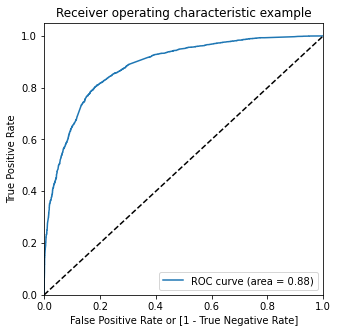

In [144]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

## 4.8 Finding Optimal Cutoff Point

- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [145]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.389505,0,1,1,1,1,0,0,0,0,0,0
1,0,0.306466,0,1,1,1,1,0,0,0,0,0,0
2,0,0.536234,1,1,1,1,1,1,1,0,0,0,0
3,1,0.102463,0,1,1,0,0,0,0,0,0,0,0
4,0,0.440694,0,1,1,1,1,1,0,0,0,0,0


In [146]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379667  1.000000  0.000000
0.1   0.1  0.603251  0.972787  0.377082
0.2   0.2  0.732195  0.920900  0.616700
0.3   0.3  0.796666  0.839260  0.770597
0.4   0.4  0.814713  0.777576  0.837442
0.5   0.5  0.804932  0.660740  0.893182
0.6   0.6  0.794049  0.589623  0.919165
0.7   0.7  0.778620  0.507620  0.944481
0.8   0.8  0.755614  0.405660  0.969798
0.9   0.9  0.705469  0.239115  0.990895


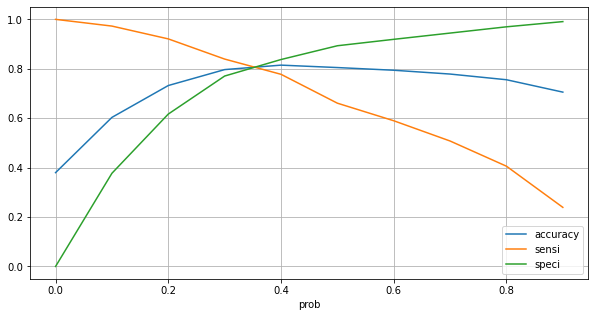

In [147]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize = (10,5))
plt.grid(True)
plt.show()

- **From the curve above, 0.34 is the optimum point to take it as a cutoff probability**

In [148]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.389505,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.306466,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.536234,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.102463,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.440694,0,1,1,1,1,1,0,0,0,0,0,1


## 4.9 Assigning Lead Score

In [149]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.389505,0,1,1,1,1,0,0,0,0,0,0,1,39
1,0,0.306466,0,1,1,1,1,0,0,0,0,0,0,0,31
2,0,0.536234,1,1,1,1,1,1,1,0,0,0,0,1,54
3,1,0.102463,0,1,1,0,0,0,0,0,0,0,0,0,10
4,0,0.440694,0,1,1,1,1,1,0,0,0,0,0,1,44


In [150]:
# Let's check the overall accuracy.
trainaccuracy= metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
trainaccuracy

0.8065849290535887

In [151]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3607,  896],
       [ 508, 2248]], dtype=int64)

In [152]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [153]:
# Let's see the sensitivity of our model
trainsensitivity= TP / float(TP+FN)
trainsensitivity

0.8156748911465893

In [154]:
# Let us calculate specificity
trainspecificity= TN / float(TN+FP)
trainspecificity

0.8010215411947591

In [155]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.19897845880524095


In [156]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7150127226463104


In [157]:
# Negative predictive value
print(TN / float(TN+ FN))

0.8765492102065614


## 4.10 Precision and Recall

- **Using sklearn utilities for the same done above**

In [158]:
from sklearn.metrics import precision_score, recall_score

precision= precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)
precision

0.7910512597741095

In [159]:
recall=recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
recall

0.6607402031930334

In [160]:
trainF1_score= 2 * (precision * recall) / (precision + recall)
trainF1_score

0.7200474495848161

### 4.10.1 Precision and recall tradeoff

In [161]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

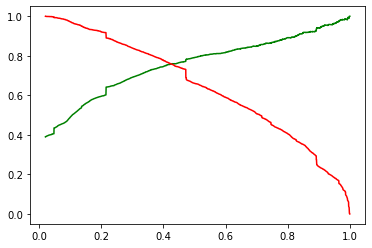

In [162]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## 4.11 Making Predictions on Test Set

In [163]:
X_test[['TotalVisits','Total Time Spent on Website',
        'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                'Total Time Spent on Website','Page Views Per Visit']])

X_test.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other_Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
count,1815.000000,1815.0,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.00000,1815.000000,1815.00000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000,1815.000000
mean,0.082094,0.0,0.044710,-0.019258,0.038414,0.547658,0.053444,0.003857,0.003857,0.328926,0.198347,0.127273,0.001102,0.040771,0.013223,0.012672,0.031956,0.031405,0.370799,0.014876,0.110744,0.006061,0.076584,0.293113,0.009917,0.007163,0.055647,0.004408,0.010468,0.109091,0.018182,0.012672,0.085950,0.042975,0.014325,0.087052,0.020937,0.055096,0.357025,0.010468,0.01157,0.004408,0.04022,0.020386,0.001102,0.001102,0.024793,0.897521,0.074380,0.073278,0.045730,0.037466,0.079339,0.006061
std,0.274583,0.0,1.019810,1.005671,1.000952,0.497861,0.224978,0.062000,0.062000,0.469952,0.398865,0.333370,0.033186,0.197815,0.114261,0.111886,0.175931,0.174458,0.483152,0.121090,0.313901,0.077635,0.266004,0.455315,0.099118,0.084351,0.229303,0.066262,0.101806,0.311839,0.133645,0.111886,0.280368,0.202857,0.118860,0.281989,0.143212,0.228231,0.479254,0.101806,0.10697,0.066262,0.19653,0.141355,0.033186,0.033186,0.155538,0.303361,0.262461,0.260664,0.208957,0.189952,0.270341,0.077635
min,0.000000,0.0,-1.143721,-0.890500,-1.257896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,-0.782595,-0.863876,-0.699374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [164]:
X_test = X_test[column6]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Other_Specialization,What is your current occupation_Working Professional
1461,0,-0.760134,0,0,0,0,0,1,0,0,1,0
7926,0,-0.462680,0,0,0,0,0,1,0,0,1,0
1909,0,-0.099125,1,0,0,0,1,0,0,0,0,0
8971,0,2.370480,1,0,0,0,1,0,0,0,0,0
5310,0,-0.705050,1,0,0,0,0,0,0,1,0,0


In [165]:
X_test_sm = sm.add_constant(X_test)

In [166]:
y_test_pred = res.predict(X_test_sm)

In [167]:
y_test_pred[:10]

1461    0.018878
7926    0.026034
1909    0.188731
8971    0.780935
5310    0.279575
4774    0.215318
2084    0.215318
6351    0.168332
335     0.892434
8202    0.224565
dtype: float64

In [168]:
# Converting y_pred to a dataframe which is an array
y_test_pred_1 = pd.DataFrame(y_test_pred)
y_test_pred_1.head()

,0
1461,0.018878
7926,0.026034
1909,0.188731
8971,0.780935
5310,0.279575


In [169]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [170]:
# Appending y_test_df and y_test_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)
y_pred_final.head()

,Converted,0
1461,0,0.018878
7926,0,0.026034
1909,0,0.188731
8971,1,0.780935
5310,0,0.279575


In [171]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Converted_prob
1461,0,0.018878
7926,0,0.026034
1909,0,0.188731
8971,1,0.780935
5310,0,0.279575


In [172]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))


In [173]:
Lead_Score=y_pred_final.copy()
y_pred_final.head()

,Converted,Converted_prob,final_predicted,Lead_Score
1461,0,0.018878,0,2
7926,0,0.026034,0,3
1909,0,0.188731,0,19
8971,1,0.780935,1,78
5310,0,0.279575,0,28


In [174]:
Lead_Score.reset_index(level=0, inplace=True)
Lead_Score.drop(['Converted', 'Converted_prob', 'final_predicted'], 1, inplace = True)
Lead_Score.head()

,index,Lead_Score
0,1461,2
1,7926,3
2,1909,19
3,8971,78
4,5310,28


In [175]:
Lead=lead_dup.copy()
Lead.reset_index(level=0, inplace=True)
Lead.drop(['Lead Origin', 'Lead Source','Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], 1, inplace = True)
Lead.head()

,index,Prospect ID,Lead Number
0,0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737
1,1,2a272436-5132-4136-86fa-dcc88c88f482,660728
2,2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727
3,3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719
4,4,3256f628-e534-4826-9d63-4a8b88782852,660681


In [176]:
Lead_Score=pd.merge(Lead,Lead_Score,on='index')
Lead_Score.drop(['index'], 1, inplace = True)
Lead_Score.head()

,Prospect ID,Lead Number,Lead_Score
0,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,9
1,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,5
2,af465dfc-7204-4130-9e05-33231863c4b5,660616,25
3,8bf76a52-2478-476b-8618-1688e07874ad,660562,87
4,88867067-3750-4753-8d33-1c7d1db53b5e,660558,12


- **As per the business requirements, there is a model to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted**

In [177]:
Lead_Score.sort_values(["Lead_Score"], ascending = False,inplace=True)
Lead_Score.head()

,Prospect ID,Lead Number,Lead_Score
509,6cb07bc3-6d9d-47a4-81e1-5c50011e380e,634040,100
1140,d23ae8c1-7938-4a8b-b22f-459adf894488,605210,100
1199,804e0cfb-559d-4a63-a635-573f7cfdf441,602459,100
1210,d34b684a-7d92-4f13-abfb-8a507ce0351c,601868,100
310,84bec27c-7b3e-4012-91e1-4aadb5a58c7a,643401,100


In [178]:
# Let's check the overall accuracy.
testaccuracy= metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
testaccuracy

0.8

In [179]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[928, 208],
       [155, 524]], dtype=int64)

In [180]:
# Let's see the sensitivity of our lmodel
testsensitivity=TP / float(TP+FN)
testsensitivity

0.8156748911465893

In [181]:
# Let us calculate specificity
testspecificity= TN / float(TN+FP)
testspecificity

0.8010215411947591

In [182]:
precision= precision_score(y_pred_final.Converted , y_pred_final.final_predicted)
precision

0.7158469945355191

In [183]:
recall=recall_score(y_pred_final.Converted , y_pred_final.final_predicted)
recall

0.7717231222385862

In [184]:
testF1_score= 2 * (precision * recall) / (precision + recall)
testF1_score

0.7427356484762581


# Final Observation:

- **With the insights from analyzing the data, We are able to build a model to produce lead Score , which helps sales team to easily target hot leads & convert them into Customers.**

In [185]:
Lead_Score

,Prospect ID,Lead Number,Lead_Score
509,6cb07bc3-6d9d-47a4-81e1-5c50011e380e,634040,100
1140,d23ae8c1-7938-4a8b-b22f-459adf894488,605210,100
1199,804e0cfb-559d-4a63-a635-573f7cfdf441,602459,100
1210,d34b684a-7d92-4f13-abfb-8a507ce0351c,601868,100
310,84bec27c-7b3e-4012-91e1-4aadb5a58c7a,643401,100
1214,3fc94a36-7f24-499e-b41e-feff6e67ec95,601835,100
41,0921ad51-b2bc-4abb-bb66-e9357b16c306,658831,100
939,5ca37d52-ad07-4658-8313-75afd90f31f3,614096,100
464,8ff353ab-1207-4608-a8cc-8172ea7c12eb,636860,100
317,d8ada66c-170f-41a9-b406-729a88b70778,643151,100


### Model Evaluation Metrics

In [186]:
# Let us compare the values obtained for Train & Test:
print("Train Data Accuracy    :{} %".format(round((trainaccuracy*100),2)))
print("Train Data Sensitivity :{} %".format(round((trainsensitivity*100),2)))
print("Train Data Specificity :{} %".format(round((trainspecificity*100),2)))
print("Train Data F1 Score    :{}  ".format(round((trainF1_score),2)))
print("Test Data Accuracy     :{} %".format(round((testaccuracy*100),2)))
print("Test Data Sensitivity  :{} %".format(round((testsensitivity*100),2)))
print("Test Data Specificity  :{} %".format(round((testspecificity*100),2)))
print("Test Data F1 Score     :{}  ".format(round((testF1_score),2)))

Train Data Accuracy    :80.66 %
Train Data Sensitivity :81.57 %
Train Data Specificity :80.1 %
Train Data F1 Score    :0.72  
Test Data Accuracy     :80.0 %
Test Data Sensitivity  :81.57 %
Test Data Specificity  :80.1 %
Test Data F1 Score     :0.74  


In [187]:
from sklearn.metrics import classification_report

print (classification_report(y_train_pred_final['Converted'], y_train_pred_final['final_predicted']))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      4503
           1       0.72      0.82      0.76      2756

    accuracy                           0.81      7259
   macro avg       0.80      0.81      0.80      7259
weighted avg       0.82      0.81      0.81      7259



In [188]:
print (classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1136
           1       0.72      0.77      0.74       679

    accuracy                           0.80      1815
   macro avg       0.79      0.79      0.79      1815
weighted avg       0.80      0.80      0.80      1815



## Determining Feature Importance
- Selecting the coefficients of the selected features from our final model excluding the intercept

In [189]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params.sort_values()

Do Not Email                                           -1.28
Specialization_Other_Specialization                    -1.19
Last Activity_Olark Chat Conversation                  -1.14
Lead Origin_Landing Page Submission                    -1.12
Last Activity_Email Opened                              0.55
Total Time Spent on Website                             1.11
Lead Source_Olark Chat                                  1.11
Last Activity_SMS Sent                                  1.73
Last Activity_Other_Activity                            2.31
What is your current occupation_Working Professional    2.69
Lead Source_Welingak Website                            3.32
Lead Origin_Lead Add Form                               3.33
dtype: float64

### Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
- **feature_importance = abs(new_params)**

In [190]:
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -38.52
Total Time Spent on Website                             33.20
Lead Origin_Landing Page Submission                    -33.64
Lead Origin_Lead Add Form                              100.00
Lead Source_Olark Chat                                  33.29
Lead Source_Welingak Website                            99.75
Last Activity_Email Opened                              16.52
Last Activity_Olark Chat Conversation                  -34.35
Last Activity_Other_Activity                            69.52
Last Activity_SMS Sent                                  52.01
Specialization_Other_Specialization                    -35.69
What is your current occupation_Working Professional    80.66
dtype: float64

**Sorting the feature variables based on their relative coefficient values**

In [191]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                             0
Total Time Spent on Website                             10
Lead Origin_Landing Page Submission                      7
Lead Origin_Lead Add Form                                2
Lead Source_Olark Chat                                   6
Lead Source_Welingak Website                             1
Last Activity_Email Opened                               4
Last Activity_Olark Chat Conversation                    9
Last Activity_Other_Activity                             8
Last Activity_SMS Sent                                  11
Specialization_Other_Specialization                      5
What is your current occupation_Working Professional     3
dtype: int64

**Plot showing the feature variables based on their relative coefficient values**

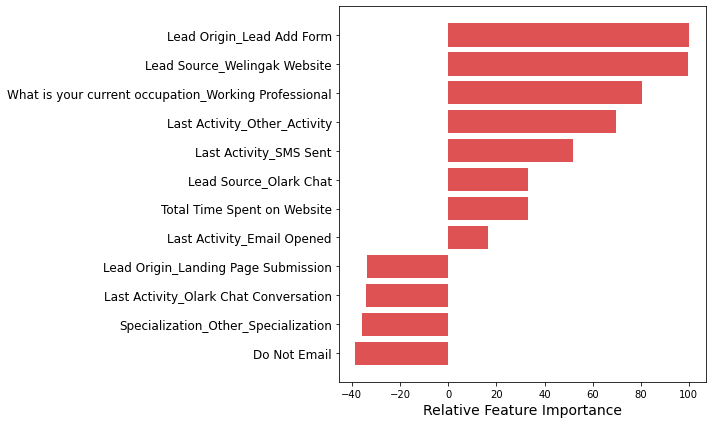

In [192]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[column6].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

### Top 3 features which contribute most towards the probability of a lead getting converted

In [193]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
3,Lead Origin_Lead Add Form,100.00
5,Lead Source_Welingak Website,99.75
11,What is your current occupation_Working Profes...,80.66


## Conclusion
- After tuning the model, these are the following characteristics:
    - All variables have p-value < 0.05. 
    - All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features.
    - The overall accuracy of 0.8 at a probability threshold of 0.34 on the test dataset is also very acceptable

**Using this model, the dependent variable value was predicted as per the following threshold values of Conversion probability:**

|Dataset|Threshold Value|Accuracy|Sensitivity|Specificity|False Positive Rate|Positive Predictive Value|Negative Predicted Value|Precision|Recall|F1 Score|
|--|--|--|--|--|--|--|--|--|--|--|
|Train|0.5|0.8049318087890894|0.6607402031930334|0.8931823228958472|0.10681767710415278|0.7910512597741095|0.8113778495057494|
|Train|0.34|0.8065849290535887|0.8156748911465893|0.8010215411947591|0.19897845880524095|0.19897845880524095|0.8765492102065614|0.7910512597741095|0.6607402031930334|0.7200474495848161|
|Test|0.34|0.8|0.8156748911465893|0.8010215411947591||||0.7158469945355191|0.7717231222385862|0.7427356484762581|

## Recommendation
- These are the strong predictors for dependent variable

|Features with Positive Coefficient Value|Coeffient Value|Features with Negative Coefficient Value|Coefficient Value|
|--|--|--|--|
Last Activity_Email Opened|0.55|Do Not Email|-1.28|
Total Time Spent on Website|1.11|Specialization_Other_Specialization   |                 -1.19|
Lead Source_Olark Chat      | 1.11|Last Activity_Olark Chat Conversation           |    -1.14|
Last Activity_SMS Sent       |  1.73|Lead Origin_Landing Page Submission    |    -1.12|
Last Activity_Other_Activity  |                          2.31|||
What is your current occupation_Working Professional|    2.69|||
Lead Source_Welingak Website                         |   3.32|||
Lead Origin_Lead Add Form                             |  3.33|||

- Website Should be made more intuitive and engaging with more information added because it's a strong predictor with a strong positive coefficient
- `Lead Add Form ` in `Lead Origin` should be given high importance
- `Welingak Website` in `Lead Source` is a reliable one in attracting new leads.